In [2]:
# RESEARCH IN PYTHON: DESCRIPTIVE STATISTICS AND EXPLORATORY DATA ANALYSIS
# by J. NATHAN MATIAS March 10, 2015

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

# THINGS TO IMPORT
# This is a good baseline set of libraries to import by default if you're rushed for time.

import codecs                     # load UTF-8 Content
import json                       # load JSON files
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
from dateutil import *            # I prefer dateutil for parsing dates
import math                       # transformations
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm      # access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting

# Acquire a Dataset

In [21]:
# Datasets from the R Dataset are accessible via Statsmodels
# http://vincentarelbundock.github.io/Rdatasets/

# U. S. State Public-School Expenditures
# code book: http://vincentarelbundock.github.io/Rdatasets/doc/car/Anscombe.html
# The observations are the U. S. states plus Washington, D. C. in 1970.
# education = Per-capita education expenditures, dollars.
# income = Per-capita income, dollars.
# young = Proportion under 18, per 1000.
# urban = Proportion urban, per 1000.

expenditures = sm.datasets.get_rdataset("Anscombe", "car")
# assign a variable to the Pandas dataframe for this dataset
expenditures_df = expenditures.data

# Summary Statistics

In [37]:
expenditures_df.describe()

,education,income,young,urban
count,51.000000,51.000000,51.000000,51.000000
mean,196.313725,3225.294118,358.886275,664.509804
std,46.454490,560.025974,23.959975,151.344821
min,112.000000,2081.000000,326.200000,322.000000
25%,165.000000,2785.500000,342.050000,552.500000
50%,192.000000,3257.000000,354.100000,664.000000
75%,228.500000,3612.000000,369.150000,790.500000
max,372.000000,4425.000000,439.700000,1000.000000


# Plot the Distribution of The Variables

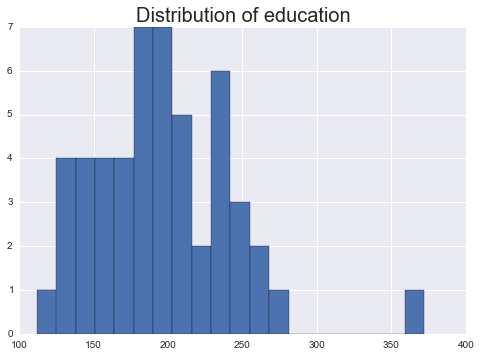

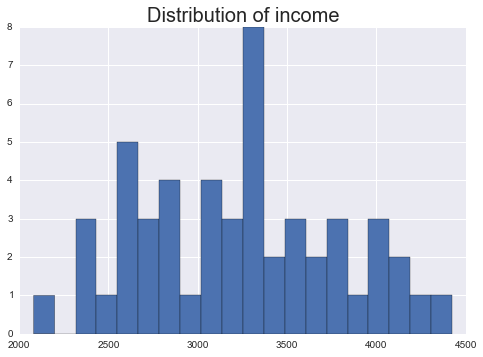

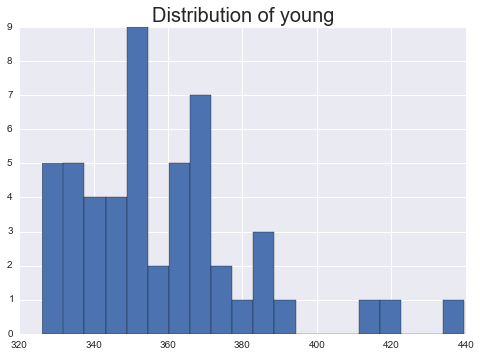

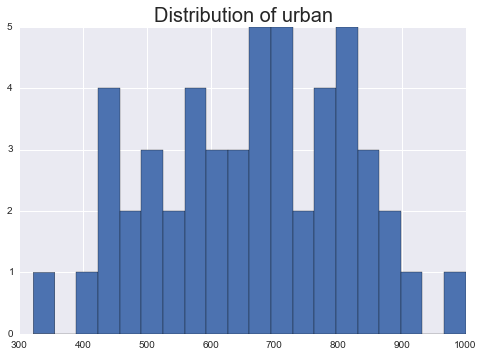

In [36]:
for col in expenditures_df.columns:
    plt.hist(expenditures_df[col], bins=20)
    plt.title("Distribution of %(col)s" % {"col":col}, fontsize="20")
    plt.show()

# Check for Correlations

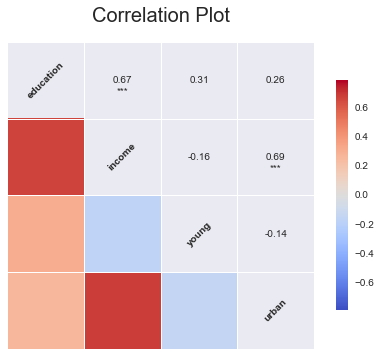

In [40]:
sns.corrplot(expenditures_df)
plt.title("Correlation Plot", fontsize="20")

# Scatterplot the predictors against the outcome 

Scattering education on income


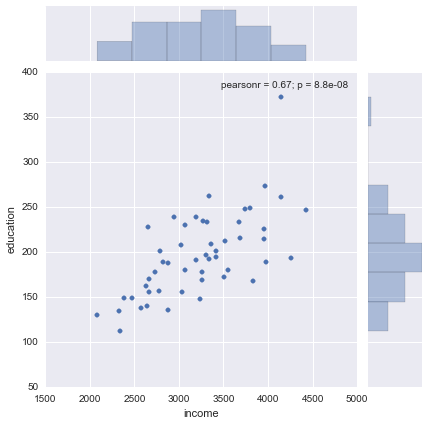

Scattering education on young


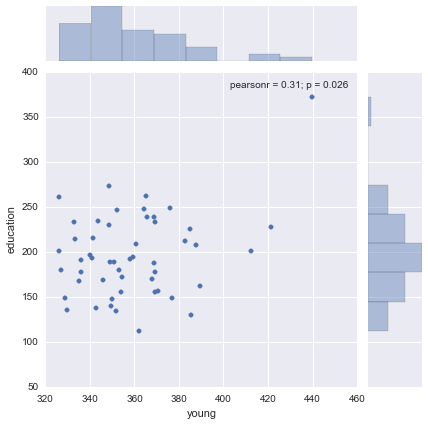

Scattering education on urban


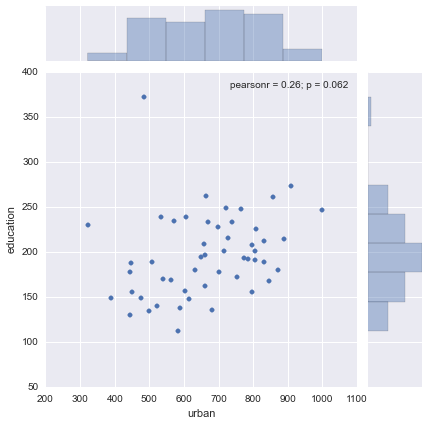

In [50]:
outcome = "education"
preds = [x for x in expenditures_df.columns if x!=outcome]
for pred in preds:
    sns.jointplot(pred, outcome, data=expenditures_df)
    print "Scattering %(o)s on %(p)s" %{"o":outcome, "p":pred}
    plt.show()